# **CAPSTONE PROJECT - Classification Tuberculosis (CL-TB)**

---

**Team ID** : CSD-087

**Nama Anggota** : 
1. M014V6039 - Marissa Audina 
2. M332V6344 - Mellania Permata Sylvie 

**Tema** : Kesehatan Diri & Mental 

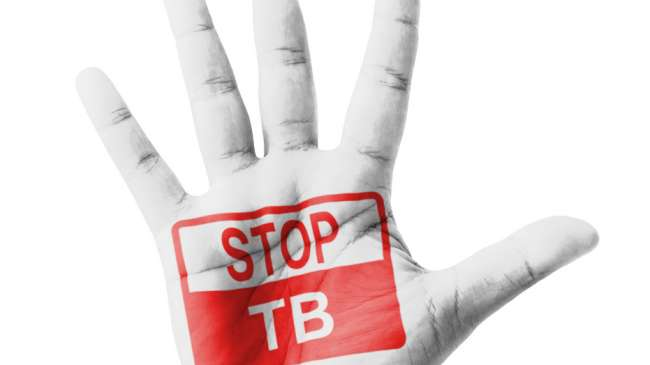

## **1. Pendahuluan**

TBC (Tuberkulosis) merupakan salah satu penyakit penyebab kematian tertinggi di Indonesia. Menurut Data Global TB Record 2021, jumlah kasus TBC yang ditemukan dan diobati di Indonesia mencapai 393.323 di tahun 2020. Diagnosa penyakit TBC ini dilakukan oleh dokter atau ahli dengan melihat citra chest x-ray pasien. Berdasarkan data citra tersebut, proyek CL-TB ini memanfaatkan machine learning dalam membangun sebuah model yang dapat mengklasifikasikan pasien normal dan pengidap TBC. Proyek ini diharapkan dapat digunakan oleh tenaga ahli atau dokter dan mempermudah proses diagnosa penyakit TBC melalui citra chest x-ray pasien

## **2. Business Understanding**

### **2.1. Problem Statements**
Seperti yang dijelaskan sebelumnya, proyek ini akan membuat  sistem klasifikasi penyakit TBC berdasarkan hasil chest-x-ray. Sehingga permasalahan yang perlu untuk diselesaikan yaitu sebagai berikut.
- Bagaimana membuat sistem klasifikasi gambar penyakit TBC ?
- Dengan data yang dimiliki, bagaimana proyek ini dapat membantu dokter dalam pengklasifikasian pengidap TBC?

### **2.2. Goals**
Sesuai dengan permasalahan yang ada, maka goals dalam proyek ini yaitu dapat menghasilkan sistem yang dapat mengklasifikasikan penyakit TBC berdasarkan hasil chest-x-ray.

### **2.3. Solution Statements**
Agar bisa menjawab masalah di atas dan mencapai goals yang sudah ditentukan, maka solusi yang dilakukan yaitu membuat model development dengan algoritma convolutional neural network (CNN). Berikut penjelasannya.
- Convolutional Neural Network merupakan salah satu jenis algoritme Deep Learning yang dapat menerima input berupa gambar, menentukan aspek atau obyek apa saja dalam sebuah gambar yang bisa digunakan mesin untuk “belajar” mengenali gambar, dan membedakan antara satu gambar dengan yang lainnya.
Arsitektur CNN terbilang mirip dengan pola koneksi neuron atau sel saraf dalam otak manusia. CNN terinspirasi dari Visual Cortex, yaitu bagian pada otak yang bertugas untuk memroses informasi dalam bentuk visual.

## **3. Data Understanding**
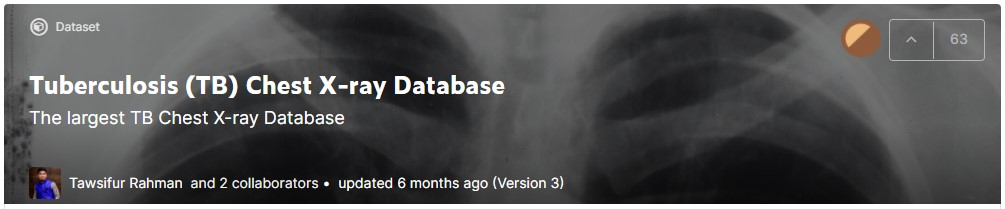

Proyek ini menggunakan dataset Tuberculosis (TB) Chest X-ray Database. Dataset ini berisi 4200 gambar chest-x-ray, dimana 3500 gambar dikategorikan sebagai Normal dan 700 gambar dikategorikan sebagai tuberculosis.
Dataset ini dapat diunduh [di sini](https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset)

## **4. Data Loading**
Tahap ini merupakan tahapan mengakses data, seperti menyiapkan library dan akses terhadap datasetnya.

**4.1. Mengunduh Dataset dari Kaggle**

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mellaniasylvie","key":"7d9b130cb8bf219918fd1ce5a04bebe6"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

tuberculosis-tb-chest-xray-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**4.2. Mengimpor Library yang akan digunakan**

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import zipfile
import os
import numpy as np

**4.3. Mengakses Dataset yang akan digunakan**

In [ ]:
local_zip = '/content/tuberculosis-tb-chest-xray-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(base_dir, 'Normal')
tbc_dir = os.path.join(base_dir, 'Tuberculosis')

In [ ]:
print('Jumlah data tbc :',len(os.listdir(tbc_dir)))
print('Jumlah data normal :',len(os.listdir(normal_dir)))

Jumlah data tbc : 700
Jumlah data normal : 3500


## **5. Data PreProcessing**
Tahap ini merupakan tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

**Menyeimbangkan jumlah Dataset**

In [ ]:
import random
path = normal_dir 
n = 2800 
img_names = os.listdir(path)  
img_names = random.sample(img_names, n) 
for image in img_names:  
  f = os.path.join(path, image) 
  os.remove(f)  

In [ ]:
print('Jumlah data tbc :',len(os.listdir(tbc_dir)))
print('Jumlah data normal :',len(os.listdir(normal_dir)))

Jumlah data tbc : 700
Jumlah data normal : 700


**Pre Processing data menggunakan tf.keras.preprocessing**

In [ ]:
TBC_Dataset = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  image_size=(150, 150)
  )

Found 1400 files belonging to 2 classes.


**Melihat Kelas pada Dataset**

In [ ]:
class_names = TBC_Dataset.class_names
print(class_names)

['Normal', 'Tuberculosis']


**Memvisualisasikan Dataset**

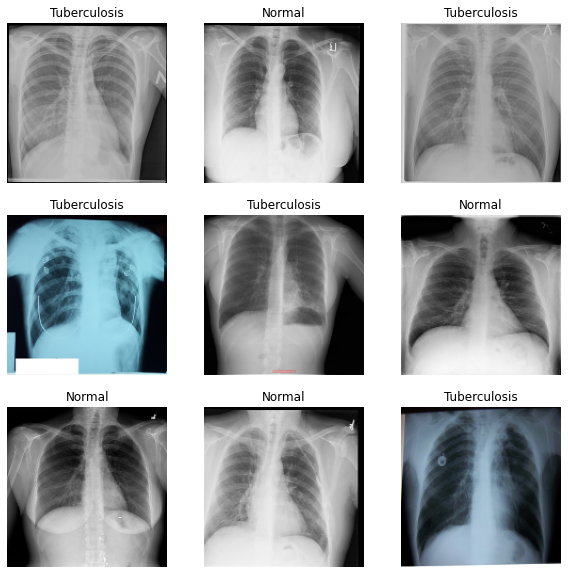

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in TBC_Dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Augmentasi Gambar**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest',
                                   validation_split=0.2
                                   )
    
validation_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 20,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode = 'nearest',
                                        validation_split=0.2
                                        )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size= 10,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size= 10,
    subset='validation'
)

Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


## **6. Modeling**

Pada tahap ini, kita akan mengembangkan model machine learning dengan algoritma convolutional neural network (CNN)

In [188]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [189]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**Penggunaan Callback**

In [190]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.001)

## **7. Training Model**

In [191]:
history = model.fit(train_generator, 
                    epochs=30,
                    validation_data=validation_generator,
                    verbose=1,
                    callbacks=[reduce_lr],
                    shuffle = True)

Epoch 1/30
112/112 [==============================] - 22s 191ms/step - loss: 0.5395 - accuracy: 0.6955 - val_loss: 0.5678 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 2/30
112/112 [==============================] - 21s 188ms/step - loss: 0.3945 - accuracy: 0.8223 - val_loss: 0.5617 - val_accuracy: 0.7821 - lr: 0.0010
Epoch 3/30
112/112 [==============================] - 21s 188ms/step - loss: 0.2971 - accuracy: 0.8643 - val_loss: 0.3038 - val_accuracy: 0.8821 - lr: 0.0010
Epoch 4/30
112/112 [==============================] - 21s 188ms/step - loss: 0.2966 - accuracy: 0.8920 - val_loss: 0.3424 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 5/30
112/112 [==============================] - 21s 188ms/step - loss: 0.2531 - accuracy: 0.8973 - val_loss: 0.3404 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 6/30
112/112 [==============================] - 21s 188ms/step - loss: 0.2299 - accuracy: 0.9054 - val_loss: 0.3028 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 7/30
112/112 [==============================] 

## **8. Evaluasi Model**

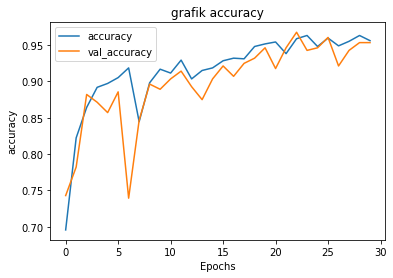

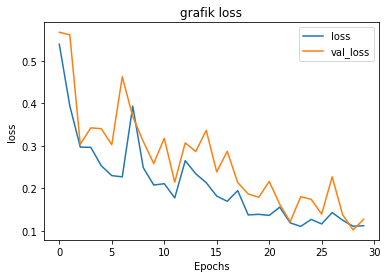

In [192]:
import matplotlib.pyplot as plt
def grafik_plot(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title('grafik '+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
grafik_plot(history, "accuracy")
grafik_plot(history, "loss")

In [193]:
prediction= model.predict(validation_generator, steps=np.ceil(validation_generator.samples/validation_generator.batch_size), verbose=2)
prediction= (prediction > 0.5)
val_labels=validation_generator.classes

28/28 - 4s - 4s/epoch - 135ms/step


0.5178571428571429
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       140
           1       0.52      0.51      0.52       140

    accuracy                           0.52       280
   macro avg       0.52      0.52      0.52       280
weighted avg       0.52      0.52      0.52       280



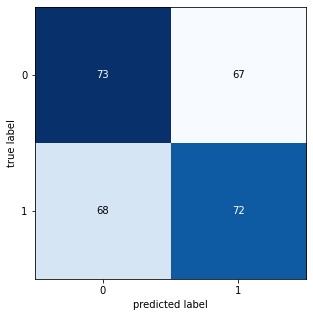

In [194]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

cm= confusion_matrix(validation_generator.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))
print(accuracy_score(validation_generator.classes, prediction))
print(classification_report(validation_generator.classes, prediction))

In [197]:
model.evaluate(train_generator)

112/112 [==============================] - 17s 150ms/step - loss: 0.1073 - accuracy: 0.9571


[0.10728143155574799, 0.9571428298950195]

In [198]:
model.evaluate(validation_generator)

28/28 [==============================] - 4s 139ms/step - loss: 0.1311 - accuracy: 0.9500


[0.13105972111225128, 0.949999988079071]

Saving Tuberculosis-15.png to Tuberculosis-15 (8).png
Tuberculosis-15.png
[[1.]]
Tuberkulosis


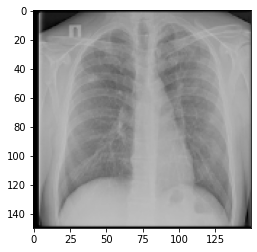

In [195]:
# memprediksi gambar yang diupload ke dalam notebook
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded_files = files.upload()
 
for pic in uploaded_files.keys():
  path = pic
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(pic)
  print(classes)
  if classes==0:
   print('Normal')
  elif classes==1:
   print('Tuberkulosis')

**Menyimpan model ke dalam h5 file**

In [199]:
if __name__ == '__main__':
    model.save("model.h5")

## 9.Penutup

Model untuk klasifikasi penyakit tuberkulosis telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi lagi seperti dengan mencoba penggunaan metode lainnya dalam membuat model seperti penggunaan transfer learning.

***Referensi***

* https://scikit-learn.org/stable/
* https://pandas.pydata.org/docs/user_guide/index.html#user-guide  
* https://medium.com/analytics-vidhya/handling-imbalanced-dataset-in-image-classification-dc6f1e13aeee
*https://www.kaggle.com/carlosgut/notebook-eda-and-cnn-basic#modeling